In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import utils
import gpfunctions as gp

In [2]:
def load_data(optimizer):
    y = np.load('./mnist-result/%s-samples_y.npy' % (optimizer) )
    x = np.load('./mnist-result/%s-samples_x.npy' % (optimizer) )
    return x,y

In [13]:
avg_y, _ = utils.average_min_found_values_across_rows(y)

gp : -0.940505
basinhopping : -0.923294
random : -0.941934
lstm-MIN-rbf : -0.945651
lstm-MIN-matern32 : -0.944720


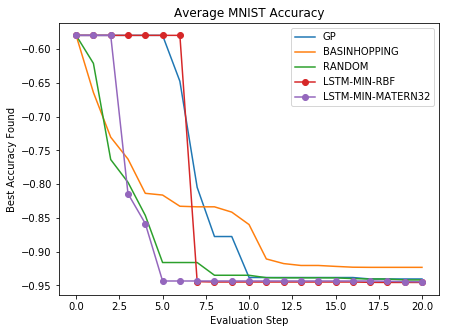

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for method in ['gp', 'basinhopping','random']:
    _,y = load_data(method)
    avg_y, _ = utils.average_min_found_values_across_rows(y)

    print('%s : %f' % (method, avg_y[-1]))
    plt.plot(avg_y, label=method.upper())
    
for method in ['lstm-MIN-rbf', 'lstm-MIN-matern32']:
# for method in ['lstm-MIN-rbf', 'lstm-MIN-matern32', 'lstm-OI-matern32']:
    _,y = load_data(method)
    avg_y, _ = utils.average_min_found_values_across_rows(y)
    plt.plot(avg_y, label=method.upper(), marker='o')
    print('%s : %f' % (method, avg_y[-1]))
plt.ylabel('Best Accuracy Found')
plt.xlabel('Evaluation Step')
plt.title('Average MNIST Accuracy')
# plt.ylim(-1,-0.5)
plt.legend()

# plt.subplot(1,2,2)
# plt.title("Ground Truth Negative Accuracy")
# plot_prior(colorbar=True)

In [95]:
%store -r 
# load heatmap for MNIST

In [142]:
CS = np.linspace(-5,10,20)
GAMMA = np.linspace(-10,4,20)

def plot_prior(plot=plt, colorbar=False):
    plt.xlabel('GAMMA=$2^x$')
    plt.ylabel('C=$2^y$')
    im = plot.imshow(-IM.T, origin='lower', extent=[GAMMA[0]-0.5,GAMMA[-1]+0.5, CS[0]-0.5, CS[-1]+0.5], vmin=-1, vmax=0, cmap='hot')
    if colorbar:
        plt.colorbar()

def plot_prior_and_model(model, run_idx=0, take_log=True, colorbar=False, plot=plt):

    plot_prior(plot=plt, colorbar=colorbar)

    x, _ =load_data(model)
    if take_log:
        x = np.log2(x[run_idx,:,:])
    else:
        x = x[0]
    plt.scatter(x[:,0], x[:,1], c='g', marker='x')

    for i in range(len(x)):
        curr = x[i]
        plt.text(curr[0], curr[1], str(i), fontsize=10, color="white")
    return im

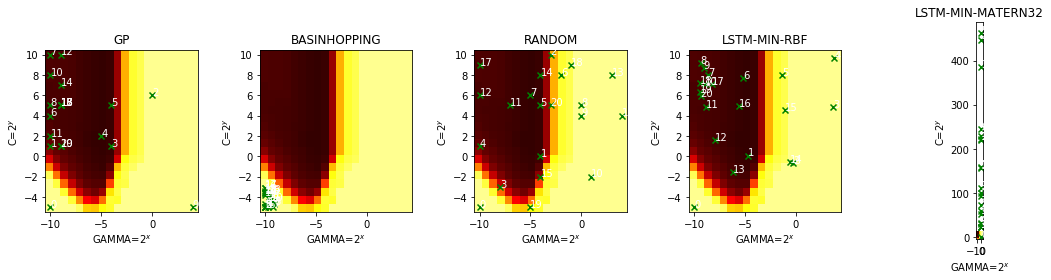

In [144]:
plt.figure(figsize=(15,4))
count = 1
for i in ['gp', 'basinhopping','random', 'lstm-MIN-rbf', 'lstm-MIN-matern32']:
    plt.subplot(1,5,count)
    if i not in ['lstm-MIN-rbf', 'lstm-OI-rbf', 'lstm-MIN-matern32']:
        im =plot_prior_and_model(i, take_log=False)

    else:
        plot_prior_and_model(i)
    plt.title(i.upper())
    count += 1
plt.tight_layout()

In [65]:
x,y = load_data('lstm-MIN-rbf')

In [50]:
2**(-10)

0.0009765625

In [66]:
x.shape

(5, 21, 2)

In [68]:
y

array([[-0.11178543, -0.86251452, -0.19107131, -0.92642128, -0.93607079,
        -0.91927841, -0.93571007, -0.91535238, -0.91785085, -0.91927841,
        -0.92177994, -0.15783706, -0.11178543, -0.87749516, -0.91929065,
        -0.17392433, -0.11178543, -0.90714879, -0.70290654, -0.20500246,
        -0.11178543],
       [-0.11464262, -0.87140196, -0.19212384, -0.93283847, -0.9424806 ,
        -0.92640527, -0.94069412, -0.91962489, -0.92248051, -0.92355118,
        -0.92926549, -0.17425131, -0.11464262, -0.85678429, -0.91676008,
        -0.18497942, -0.11464262, -0.9135496 , -0.82963366, -0.65675888,
        -0.11464262],
       [-0.11249972, -0.87320739, -0.19108049, -0.92536056, -0.93321262,
        -0.91714371, -0.93035547, -0.91249319, -0.91678401, -0.91678401,
        -0.92213964, -0.15743553, -0.11249972, -0.87250433, -0.91749728,
        -0.18715752, -0.11249972, -0.89250131, -0.74213417, -0.27639036,
        -0.11249972],
       [-0.12607124, -0.88534208, -0.20535579, -0.93285224

In [85]:
np.log(0.000554)

-7.4983458712169906

In [79]:
2**(-5)

0.03125